
## Classification Models from Scratch: KNN & Decision Trees
## Classification Models using SKLearn: Linear Kernel SVM, Polynomial Kernel SVM, RBF Kernel SVM 


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [3]:
#  Load the dataset from the csv file using pandas. The file is called 'data.csv'
dataset = pd.read_csv('data.csv')

#  Print the shape of the data
print(dataset.shape)

#  Print the first 5 rows of the data
print(dataset.head(5))

(2000, 3)
         x1        x2    y
0  1.388103  0.541000  1.0
1  0.257498  1.034341  0.0
2  0.481232 -0.175209  1.0
3 -0.925897 -0.221878  0.0
4  0.783837 -0.486287  1.0


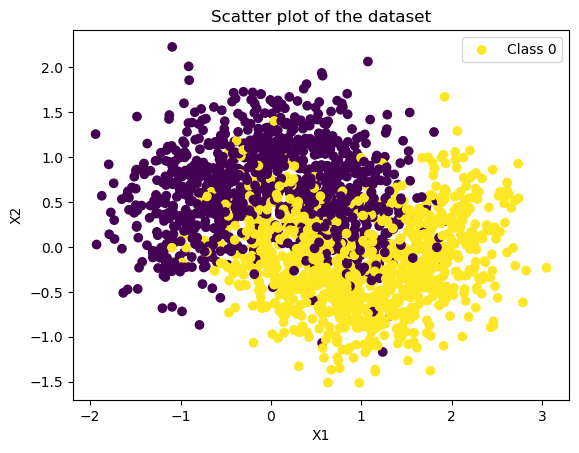

In [9]:
#  Visualize the data using a scatter plot. Be sure to include a legend
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], c=dataset.iloc[:, 2], label='Class 0')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of the dataset')
plt.legend()
plt.show()

In [10]:
# using a 80/20 split
#  print the number of rows in the train and test sets

def split(df, test_size=0.2):
    
    shuffled_df = df.sample(frac=1)  
    test_data_size = int(len(df) * test_size)
    test_data = shuffled_df.iloc[:test_data_size]
    train_data = shuffled_df.iloc[test_data_size:]
    
    return train_data, test_data

train_set, test_set = split(dataset)

print(f"Rows in train set: {len(train_set)}")
print(f"Rows in test set: {len(test_set)}")




Rows in train set: 1600
Rows in test set: 400


In [11]:
#  Separate into X and y
X_train = train_set.iloc[:, :-1]
y_train = train_set.iloc[:, -1]
X_test =  test_set.iloc[:, :-1]
y_test =  test_set.iloc[:, -1]

# Classification Models From Scratch

In [12]:
def plot_decision_boundary(model, X, y):
    '''
    Function to plot the decision boundary of a classification model.
    Parameters:
        model: the classification model
        X: the input features
        y: the target labels
    '''

    # Set min and max values and give it some padding
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.05

    # Generate a grid of points with distance h between them
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[x1.ravel(), x2.ravel()])
    Z = np.array(Z).reshape(x1.shape)

    # Plot the contour and training examples
    plt.contourf(x1, x2, Z, cmap=plt.cm.Set1, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='.', s=20, linewidth=1, alpha=0.2, cmap=plt.cm.Set1)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Dataset")
    plt.show()

## K-Nearest Neighbors (30 marks)
KNNs are a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation. In this algorithm, an object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

### Distance Function
We will use the Euclidean distance function to find the nearest neighbors.

In [13]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

### KNN Classifier
This is the main KNN classifier. It should have the following methods:
- __init__: This is the constructor of the class. It takes k as an argument and initializes the class. Default value of k should be 3, but the user should be able to change it.
- __fit__: This method takes the training data and the training labels as arguments. It stores the training data and labels to be used later.
- __predict__: This method takes the test data and returns the predicted labels for the test data. It should use the Euclidean distance function to find the k nearest neighbors and return the most common label among the neighbors. In case of a tie, you can break the tie in any way you want.

In [14]:
#  Implement the KNN classifier from scratch
# NOTE: You are allowed to alter method signatures and create as many helper functions as needed 

class KNN:
    
    def __init__(self, k=3):
        
        self.k = k
        self.X_train = None
        self.y_train = None

        return 

    def fit(self, X_train, y_train):

        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

        return 
    
    def predict(self, X_test):

        X_test = np.array(X_test)
        predictions = []  

        for test_point in X_test:  

            distances = [] # dist of curr test pt from all train pts

            for train_point in self.X_train: 
                
                dist = euclidean_distance(test_point, train_point) 
                distances.append(dist)  

            nearest_neighbors_indices = np.argsort(distances)[:self.k] # get indices of k nearest neighbors
            nearest_labels = [self.y_train[i] for i in nearest_neighbors_indices]

            labels_count = {} # freq of each label in k nearest neighbors

            for label in nearest_labels:

                if label not in labels_count:
                    labels_count[label] = 0
                
                labels_count[label] += 1

            sorted_labels = sorted(labels_count.items(), key=lambda x: x[1], reverse=True)
            most_common_label = sorted_labels[0][0]
            
            predictions.append(most_common_label)

        return predictions

### Evaluation

To understand more about each of these metrics, refer to the following links:
- [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision)
- [Precision](https://en.wikipedia.org/wiki/Precision_and_recall)
- [Recall](https://en.wikipedia.org/wiki/Precision_and_recall)
- [F1 Score](https://en.wikipedia.org/wiki/F_score)
- [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

In [15]:
#  Create a KNN object and train it using the training data

knn = KNN(k=3)  
knn.fit(X_train, y_train) 

#  Make predictions on the test data

knn_y_pred = knn.predict(X_test)

#  Evaluate the model using accuracy, precision, recall, and f1 score

accuracy = accuracy_score(y_test, knn_y_pred)
precision = precision_score(y_test, knn_y_pred)  
recall = recall_score(y_test, knn_y_pred)
f1 = f1_score(y_test, knn_y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.83
Precision: 0.85
Recall: 0.82
F1 Score: 0.84


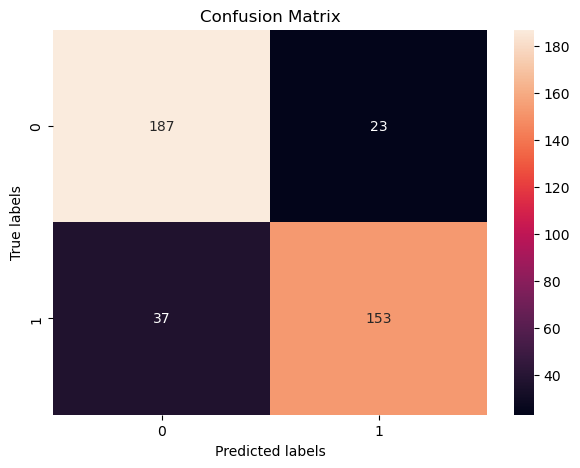

In [86]:
#  Create a confusion matrix and plot it using a heatmap. 
# You can use sklearn's confusion_matrix function to create the matrix
# and seaborn's heatmap function to plot it. The libraries has been imported for you

conf_matrix = confusion_matrix(y_test, knn_y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g')  # 'g' means to format the numbers as integers
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Plot Decision Boundary
Since our data is 2D, we can also plot the decision boundary. The decision boundary is the region in the input space where the output label of the classifier changes. To plot the decision boundary, you can create a meshgrid and classify all the points in the meshgrid. To understand these functions, you can use the provided links: [`meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html), [`ravel`](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html), and [`contourf`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html).

Plot the decision boundary, along with a scatter-plot of the **Entire Dataset**. The code for this is given in the `plot_decision_boundary` function given to you at the start.

We are looking for something like this: (Note that this is not the decision boundary for the given dataset. It is just an example.)


<center>
<img src="https://cdn.hashnode.com/res/hashnode/image/upload/v1639752060348/CzQh-pR6T.png" alt="image" width="400">
</center>


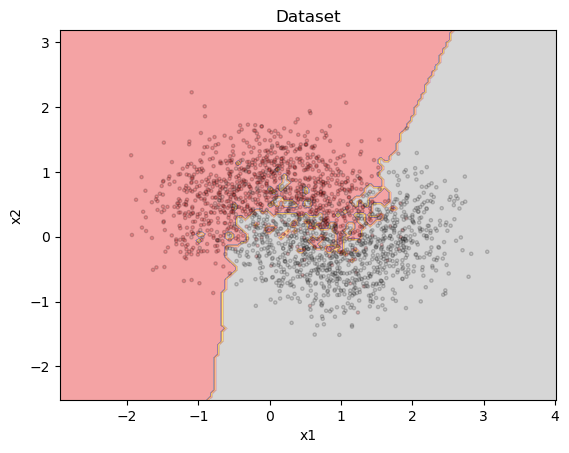

In [101]:
#  Plot the decision boundary along with the scatter plot of the total dataset for K=3
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
plot_decision_boundary(knn, np.array(X), np.array(y))

After seeing how our initial model performed with a default value of `k` , we will now explore different `k` values. This step will help us find the best `k` setting to improve our model's ability to predict accurately

- Use the `plot_decision_boundary` function given above to plot the decision boundaries and scatter plots for different values of `k` from 1 to 10.
- Gather the accuracy for each `k` value on the test set and compare them. Show these comparisons in a graph to easily see which `k` value leads to the best predictions. This will help us choose the best k value for our model.

Decision Boundary for k=1


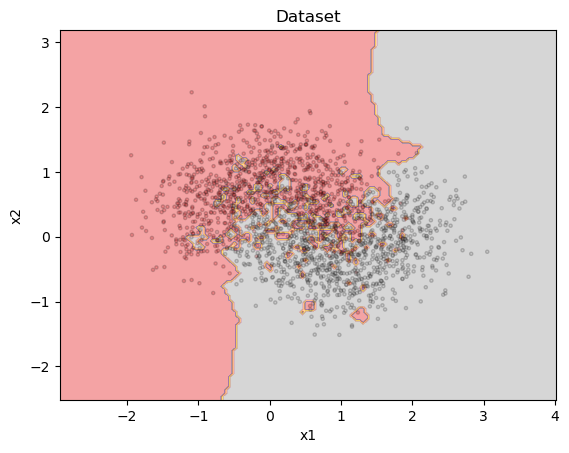

Decision Boundary for k=2


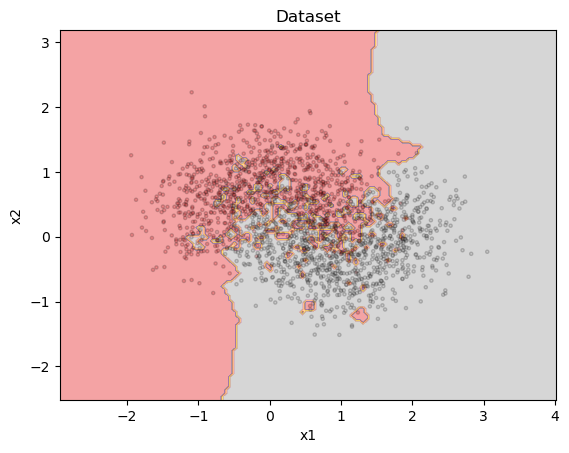

Decision Boundary for k=3


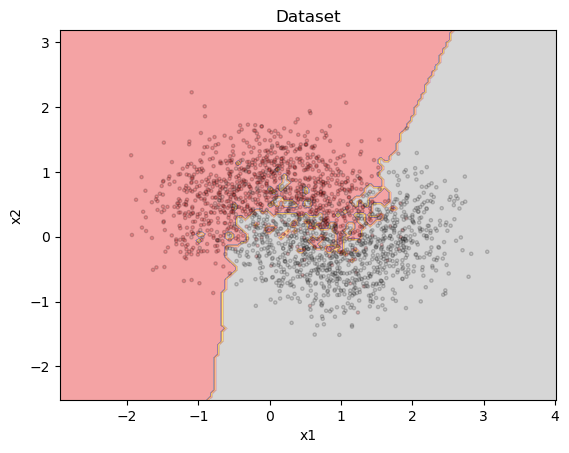

Decision Boundary for k=4


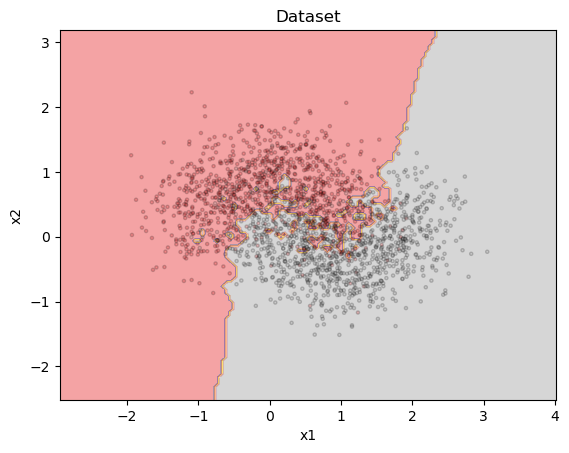

Decision Boundary for k=5


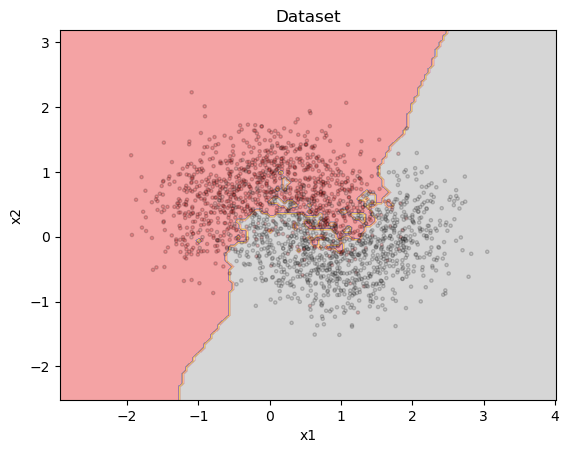

Decision Boundary for k=6


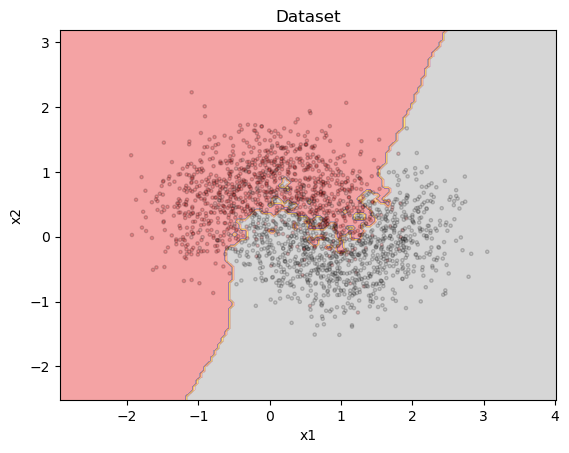

Decision Boundary for k=7


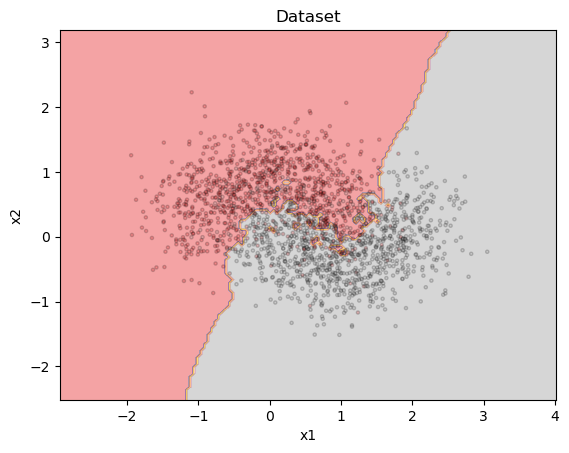

Decision Boundary for k=8


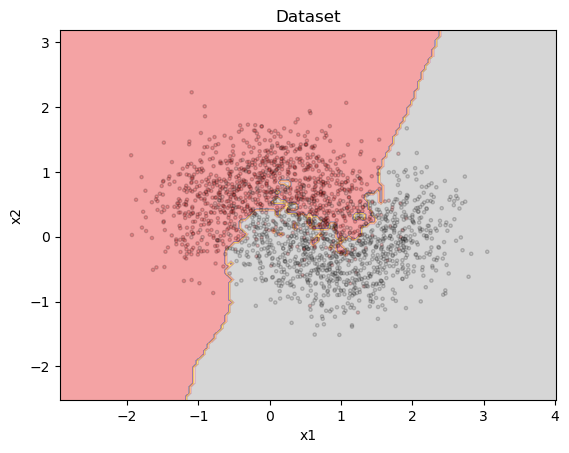

Decision Boundary for k=9


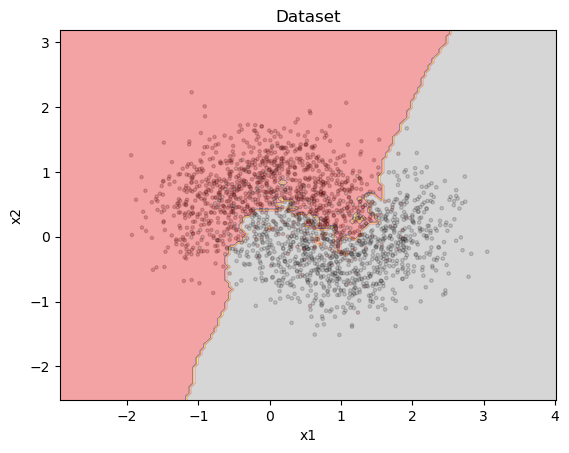

Decision Boundary for k=10


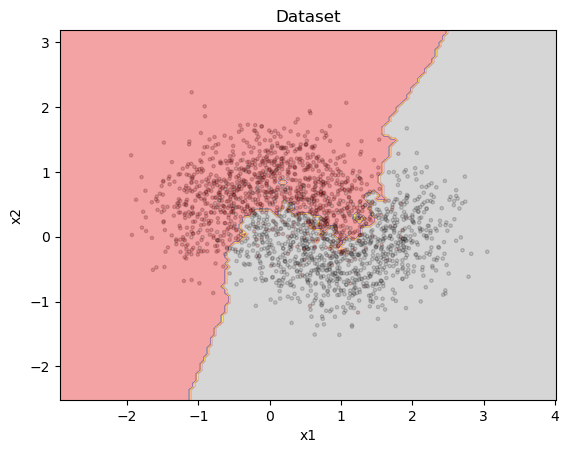

In [104]:
#  Plot the decision boundary along with the scatter plot of the test dataset for K=1 to K=10

k_values = range(1, 11)
accuracies = []

for k in k_values:

    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f'Decision Boundary for k={k}')
    plot_decision_boundary(knn, np.array(X), np.array(y))  # X and y should be the full dataset without labels

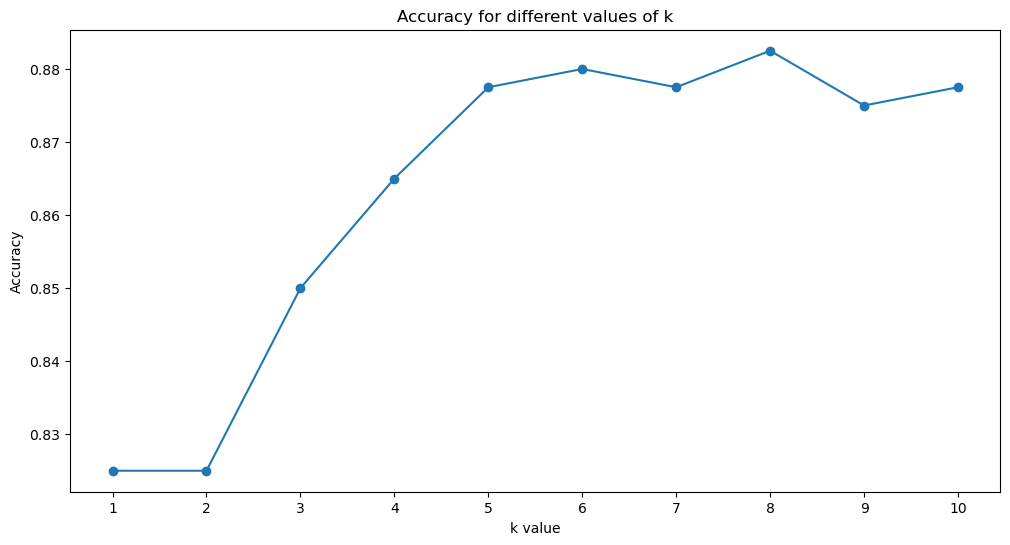

In [105]:
#  Plot the accuracies of the model for different values of k

plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy for different values of k')
plt.xticks(k_values)
plt.show()

A smaller k value like 1 leads to a highly complex decision boundary that closely follows the training data, which can indicate overfitting. On the other hand, as k increases, the decision boundary smoothens out meaning the model starts to generalize better, potentially reducing overfitting. In low values of k, the  extremely irregular decision boundary also suggests that it is very sensitive to noise in the data and as k increases, this complexity reduces, suggesting a more robust decision-making process that may perform better on unseen data. Moreover, with higher values of k, the influence of outliers is reduced, and the decision is based on a larger pool of neighbors. In terms of the bias-varinace tradeoff, too low a k value can mean high variance, and too high can mean high bias. Therefore, from the graphs, there seems to be a mid-range k value that might offer the best trade-off which is why optimal k seems to be around 5 to 7, where the accuracy is also at its peak before it starts to decline/fluctuate. This is the range where the balance between bias and variance is likely to be the best, given the current dataset.

## Decision Tree 
A decision tree is a flowchart-like structure in which each internal node represents a test on a feature. Each leaf node represents a class label. The paths from the root to leaf represent classification rules.

I use entropy as the measure of impurity and calculate the information gain to split the nodes.

### Decision Tree Classifier
This class will serve as the decision tree classifier. It should have the following methods:
- __init__: This is the constructor of the class. It initializes the class with the maximum depth of the tree. The default value of the maximum depth should be 5, but the user should be able to change it.
- __fit__: This method takes the training data and the training labels as arguments. It should build the decision tree using the training data and labels. You are to use the algorithm discussed in the class to build the decision tree.
- __predict__: This method takes the test data and returns the predicted labels for the test data.

In [164]:
class DecisionTree:

    def __init__(self, max_depth=5):

        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):

        self.tree = self.buildTree(X, y, 0)

    def predict(self, X):

        return [self.traverse(x, self.tree) for x in X]


    def entropy(self, y):

        unique_classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        entropy = -np.sum(probabilities * np.log2(probabilities))
        
        return entropy

    def getBestSplit(self, X, y):
        
        best_gain = -1
        best_feature = None
        best_split_val = None
        
        for feature_index in range(X.shape[1]):
        
            unique_values = np.unique(X[:, feature_index])

            for i in range(len(unique_values) - 1):

                split_val = (unique_values[i] + unique_values[i + 1]) / 2
                current_gain = self.informationGain(X, y, feature_index, split_val)

                if current_gain > best_gain:

                    best_gain = current_gain
                    best_feature = feature_index
                    best_split_val = split_val

        return best_gain, best_feature, best_split_val
    
    def informationGain(self, X, y, feature_index, split_val):

        left_split = X[:, feature_index] < split_val
        right_split = X[:, feature_index] >= split_val

        left_entropy = self.entropy(y[left_split])
        right_entropy = self.entropy(y[right_split])

        weighted_entropy = (np.sum(left_split) / len(y)) * left_entropy \
                        + (np.sum(right_split) / len(y)) * right_entropy

        total_entropy = self.entropy(y)
        information_gain = total_entropy - weighted_entropy

        return information_gain


    def traverse(self, x, tree):

        if isinstance(tree, dict):

            feature = tree['feature']
            split_val = tree['split_val']

            if x[feature] >= split_val:

                return self.traverse(x, tree['true_branch'])

            else:

                return self.traverse(x, tree['false_branch'])

        else:

            return tree

    def buildTree(self, X, y, depth):

        if depth >= self.max_depth or len(y) == 0 or len(np.unique(y)) == 1:

            return np.unique(y, return_counts=True)[0][np.argmax(np.unique(y, return_counts=True)[1])] if len(y) > 0 else None

        gain, feature, split_val = self.getBestSplit(X, y)
        
        if gain == 0:

            return np.unique(y, return_counts=True)[0][np.argmax(np.unique(y, return_counts=True)[1])]

        true_branch = X[:, feature] >= split_val
        false_branch = X[:, feature] < split_val

        if true_branch.any() and false_branch.any():

            true_X, true_y = X[true_branch], y[true_branch]
            false_X, false_y = X[false_branch], y[false_branch]

            true_subtree = self.buildTree(true_X, true_y, depth + 1)
            false_subtree = self.buildTree(false_X, false_y, depth + 1)
 
            return {
                'feature': feature,
                'split_val': split_val,
                'true_branch': true_subtree,
                'false_branch': false_subtree
            }

        else:

            return np.unique(y, return_counts=True)[0][np.argmax(np.unique(y, return_counts=True)[1])]



### Evaluation


In [165]:
#  Create a DecisionTree object and train it using the training data
dt = DecisionTree(max_depth=5)
dt.fit(np.array(X_train), np.array(y_train))

# import pprint 
# pprint.pprint(dt.tree, sort_dicts=False)

#  Make predictions on the test data
dt_y_pred = dt.predict(np.array(X_test))

#  Evaluate the model using accuracy, precision, recall, and f1 score
accuracy = accuracy_score(np.array(y_test), dt_y_pred)
precision = precision_score(np.array(y_test), dt_y_pred)  
recall = recall_score(np.array(y_test), dt_y_pred)        
f1 = f1_score(np.array(y_test), dt_y_pred)                

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.86
Precision: 0.85
Recall: 0.86
F1 Score: 0.86


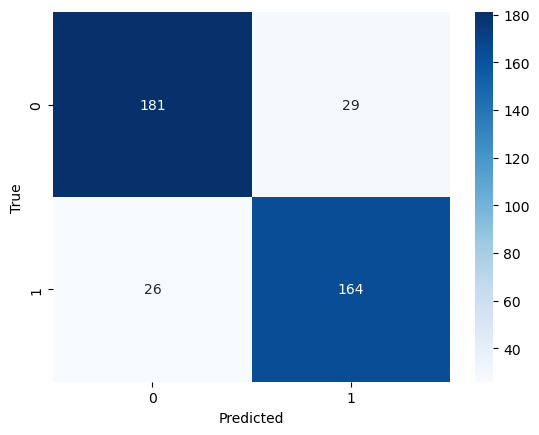

In [166]:
#  Create a confusion matrix and plot it using a heatmap. 
# You can use sklearn's confusion_matrix function to create the matrix
# and seaborn's heatmap function to plot it. The libraries has been imported for you

conf_matrix = confusion_matrix(y_test, dt_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Plot Decision Boundary
Similar to the KNN classifier, plot the decision boundary for the decision tree classifier. Also, plot the decision boundary along with a scatter plot of the **Entire Data**. You are supposed to use the `plot_decision_boundary` function given to you at the start

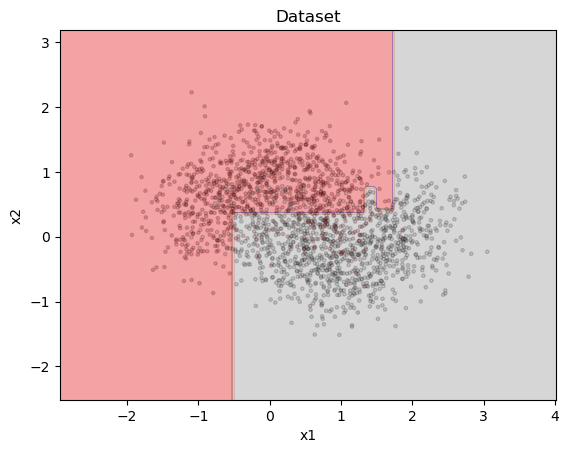

Text(0.5, 1.0, 'Scatter Plot of Entire Data')

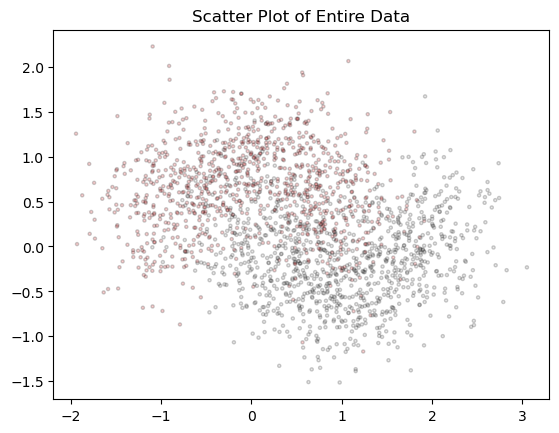

In [167]:
plot_decision_boundary(dt, np.array(X), np.array(y))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='.', s=20, linewidth=1, alpha=0.2, cmap=plt.cm.Set1)
plt.title('Scatter Plot of Entire Data')


After seeing how our initial model performed with a default value of Max depth , we will now explore different Max depth values. This step will help us find the best Max depth setting to improve our model's ability to predict accurately


Decision Boundary for Max Depth = 1


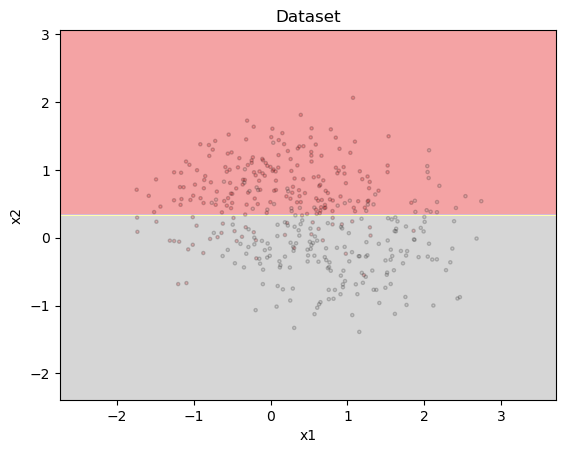

Decision Boundary for Max Depth = 2


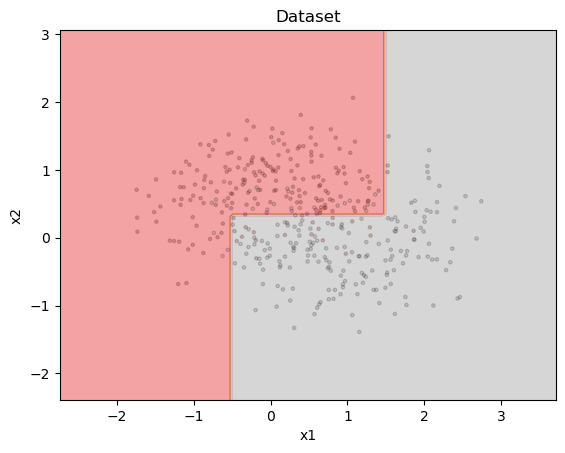

Decision Boundary for Max Depth = 3


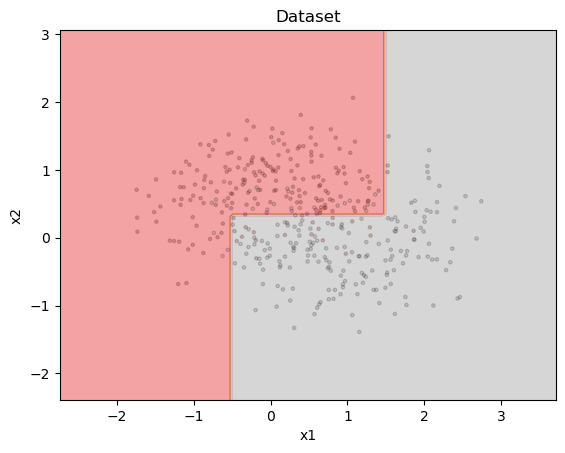

Decision Boundary for Max Depth = 4


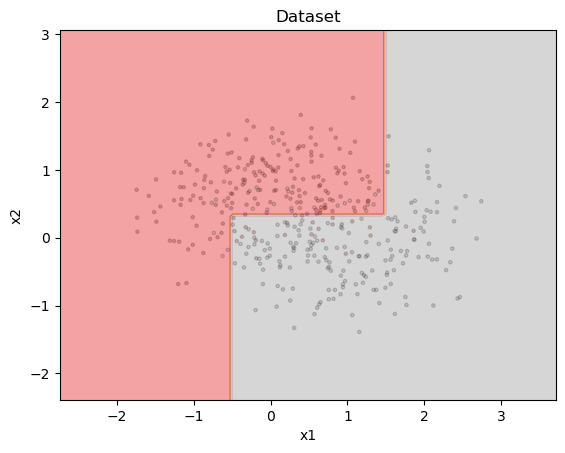

Decision Boundary for Max Depth = 5


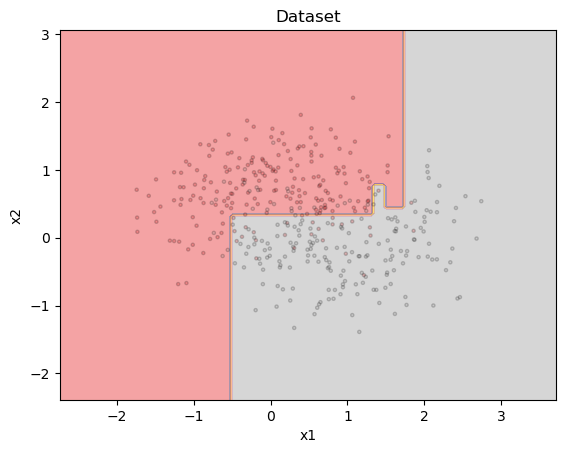

Decision Boundary for Max Depth = 6


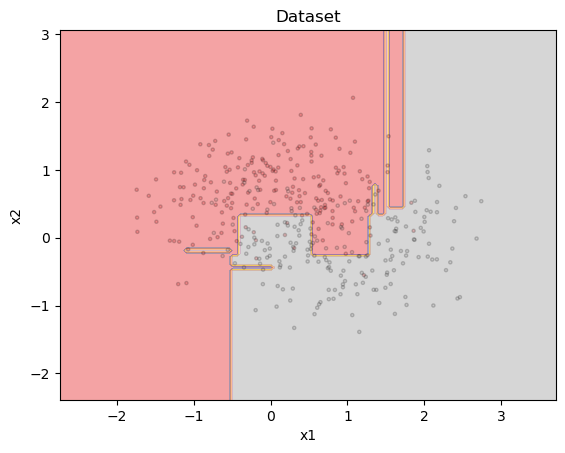

Decision Boundary for Max Depth = 7


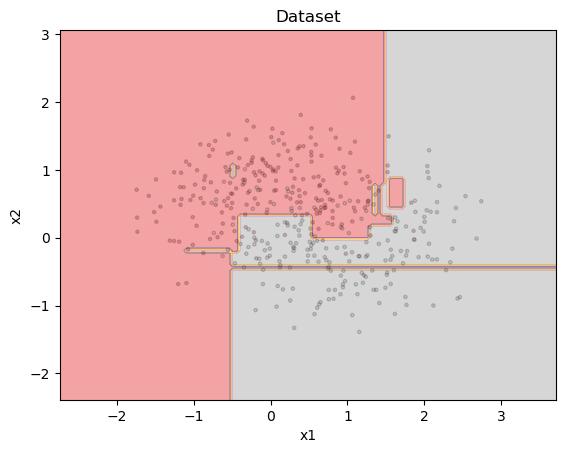

Decision Boundary for Max Depth = 8


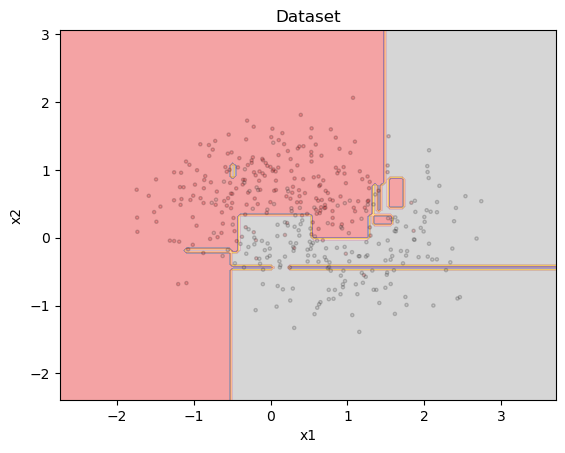

Decision Boundary for Max Depth = 9


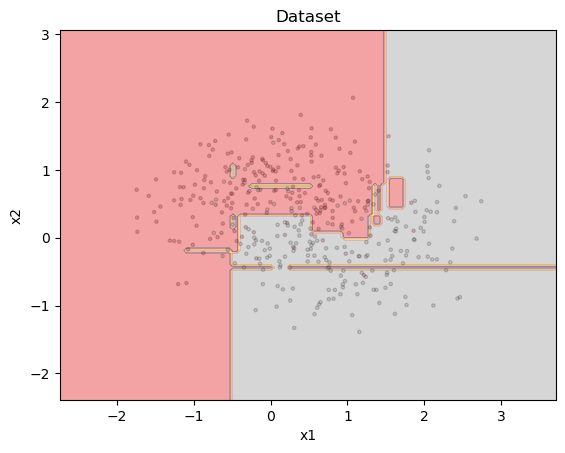

Decision Boundary for Max Depth = 10


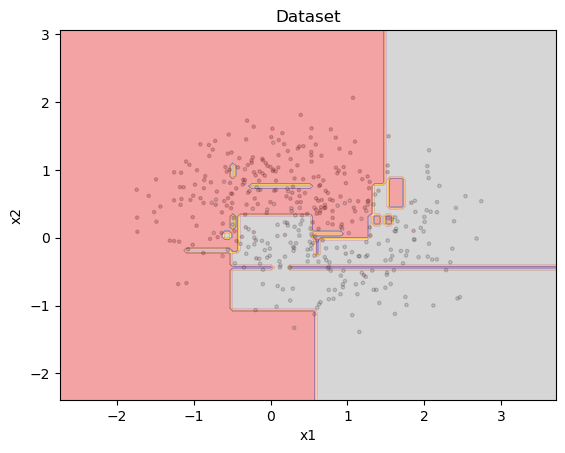

Decision Boundary for Max Depth = 11


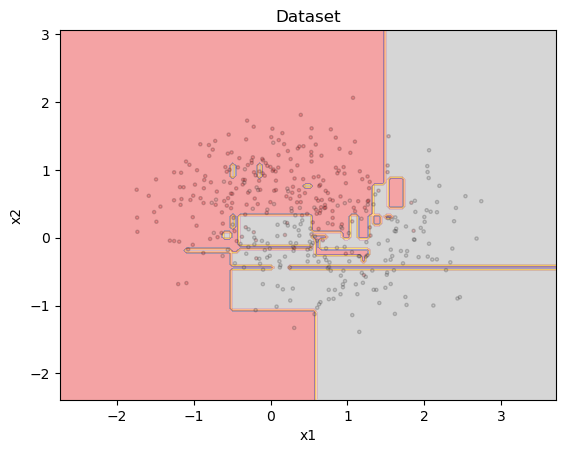

Decision Boundary for Max Depth = 12


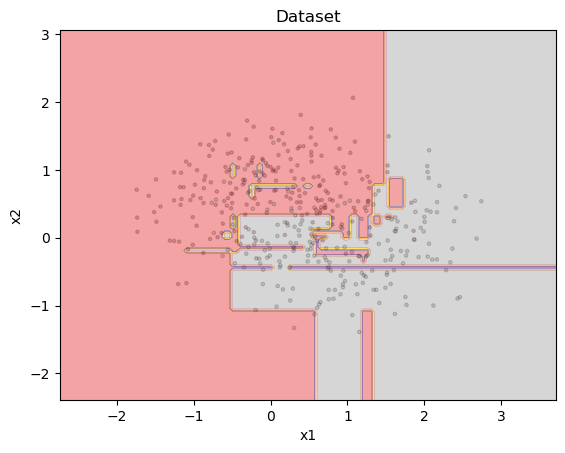

Decision Boundary for Max Depth = 13


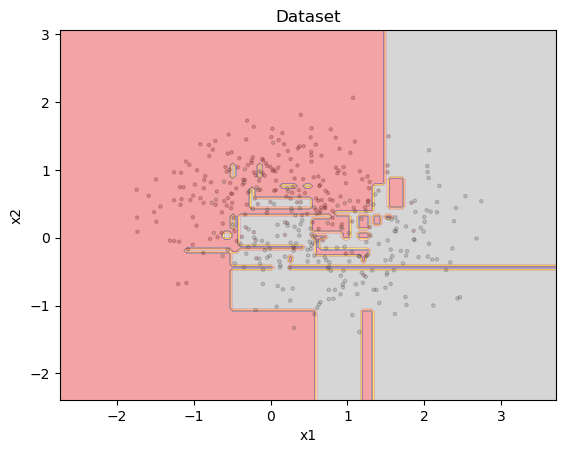

Decision Boundary for Max Depth = 14


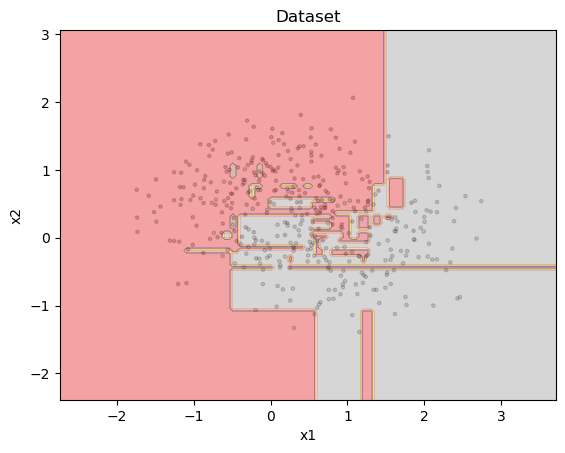

Decision Boundary for Max Depth = 15


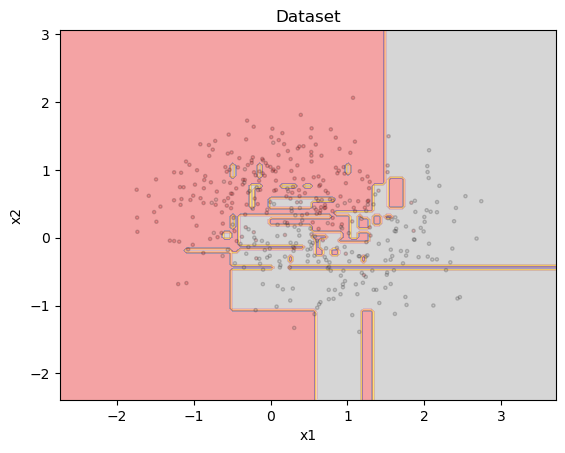

In [170]:
#  Plot the decision boundary on the test set for different values of max_depth from 1 to 15

accuracies = []
max_depth_values = range(1, 16)

for max_depth in max_depth_values:

    dt = DecisionTree(max_depth=max_depth)
    dt.fit(np.array(X_train), np.array(y_train))
    
    dt_y_pred = dt.predict(np.array(X_test))
    accuracy = accuracy_score(y_test, dt_y_pred)
    accuracies.append(accuracy)
    
    print(f'Decision Boundary for Max Depth = {max_depth}')
    plot_decision_boundary(dt, np.array(X_test), np.array(y_test))

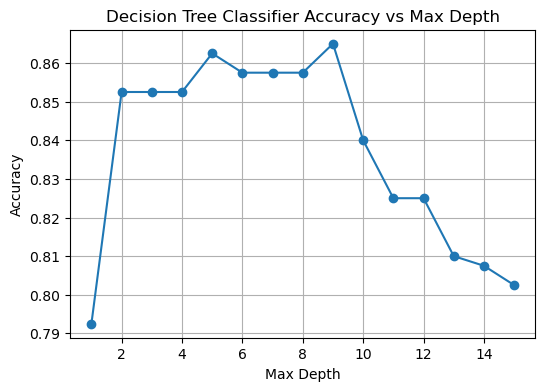

In [171]:
#  Plot the accuracies of the model for different values of max_depth

plt.figure(figsize=(6, 4))
plt.plot(max_depth_values, accuracies, marker='o')
plt.title('Decision Tree Classifier Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

At low max depths the decision boundaries are very simple and do not capture the complexity of the data distribution indicating underfitting. As the maximum depth increases, the decision boundaries become more complex and start to capture more nuances in the data. However, beyond a certain point increasing the maximum depth leads to overly complex decision boundaries that attempt to capture every small variation in the data, including noise which indicates overfitting. We can conclude that an optimal value for the maximum depth would be at the point just before the accuracy graph plateaus or at the beginning of the plateau which is around 5 or 6, providing a good balance between fitting the data well and not overfitting.

# Classification Models Using Libraries
The above models were implemented from scratch. Now, we will use the libraries to implement the models and compare the results.

There are many libraries available for implementing classification models, such as sklearn, tensorflow, keras, etc. We will use the sklearn library to implement the models.

## SVMs using sklearn 

SVM, or Support Vector Machines, is a type of supervised learning algorithm. The algorithm tries to find a hyperplane that best separates the classes. The best hyperplane is the one that has the maximum margin, or the maximum distance between data points of both classes. For this part, you will use the sklearn library to build the SVM classifier, and try out different kernels (linear, polynomial, and RBF).

To build the SVM classifier, you can use the `SVC` class from the `sklearn.svm` module. You can read more about the `SVC` class [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

## Linear Kernel SVM
Import the `SVC` class from the `sklearn.svm` module and build the SVM classifier using the linear kernel. 

In [120]:
#  Import the SVC class from sklearn
#  Instantiate and train the SVM classifier. Use linear kernel. Use the link given above, and play with the parameters to get the best results

from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(np.array(X_train), np.array(y_train))

SVC(kernel='linear')

#### Evaluation


In [121]:
#  Make predictions on the test data
svm_linear_y_pred = svm.predict(np.array(X_test))

#  Evaluate the model using accuracy, precision, recall, and f1 score
accuracy = accuracy_score(np.array(y_test), svm_linear_y_pred)
precision = precision_score(np.array(y_test), svm_linear_y_pred)
recall = recall_score(np.array(y_test), svm_linear_y_pred)
f1 = f1_score(np.array(y_test), svm_linear_y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.84
Precision: 0.86
Recall: 0.79
F1 Score: 0.83


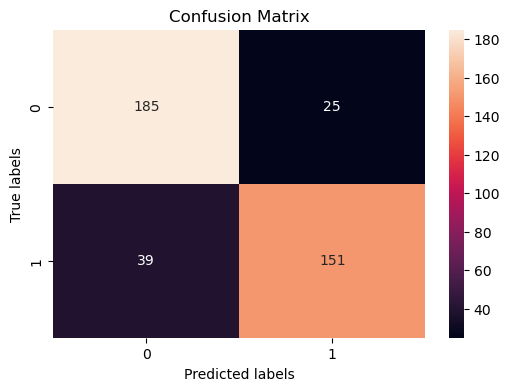

In [124]:
#  Create a confusion matrix and plot it using a heatmap. 
# You can use sklearn's confusion_matrix function to create the matrix
# and seaborn's heatmap function to plot it. The libraries has been imported for you

conf_matrix = confusion_matrix(y_test, svm_linear_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix For Linear Kernel SVM')
plt.show()

#### Plot Decision Boundary


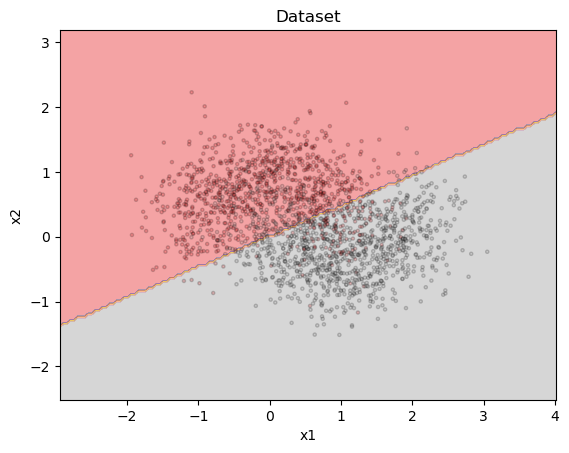

Text(0.5, 1.0, 'Scatter Plot of Entire Data')

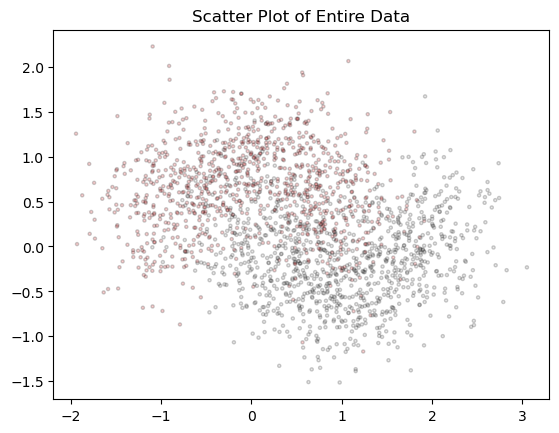

In [126]:
#  Plot the decision boundary and the scatter plot of the dataset

plot_decision_boundary(svm, np.array(X), np.array(y))

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='.', s=20, linewidth=1, alpha=0.2, cmap=plt.cm.Set1)
plt.title('Scatter Plot of Entire Data')

## Polynomial Kernel SVM
Import the `SVC` class from the `sklearn.svm` module and build the SVM classifier using the polynomial kernel.

In [128]:
#  Import the SVC class from sklearn
from sklearn.svm import SVC

#  Instantiate and train the SVM classifier. Use polynomial kernel. Use the link given above, and play with the parameters to get the best results
svm_poly = SVC(kernel='poly', degree=3)  
svm_poly.fit(np.array(X_train), np.array(y_train))

SVC(kernel='poly')

#### Evaluation


In [129]:
#  Make predictions on the test data
svm_polynomial_y_pred = svm_poly.predict(X_test)

#  Evaluate the model using accuracy, precision, recall, and f1 score
accuracy = accuracy_score(np.array(y_test), svm_polynomial_y_pred)
precision = precision_score(np.array(y_test), svm_polynomial_y_pred)
recall = recall_score(np.array(y_test), svm_polynomial_y_pred)
f1 = f1_score(np.array(y_test), svm_polynomial_y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.80
Precision: 0.88
Recall: 0.67
F1 Score: 0.76


/Users/ajm/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


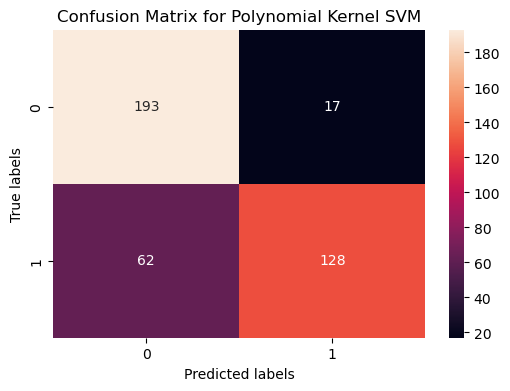

In [130]:
#  Create a confusion matrix and plot it using a heatmap. 
# You can use sklearn's confusion_matrix function to create the matrix
# and seaborn's heatmap function to plot it. The libraries has been imported for you

conf_matrix = confusion_matrix(y_test, svm_polynomial_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Polynomial Kernel SVM')
plt.show()

#### Plot Decision Boundary


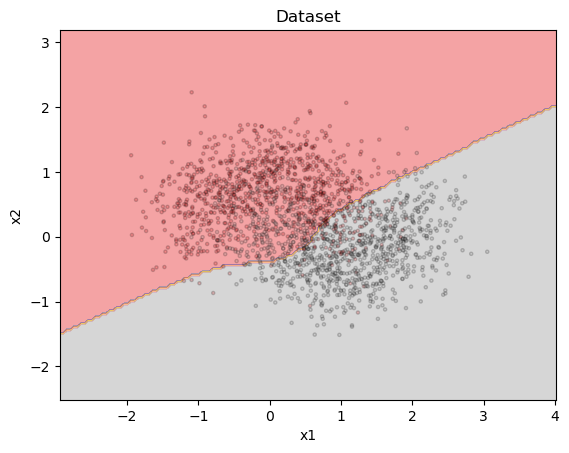

Text(0.5, 1.0, 'Scatter Plot of Entire Data')

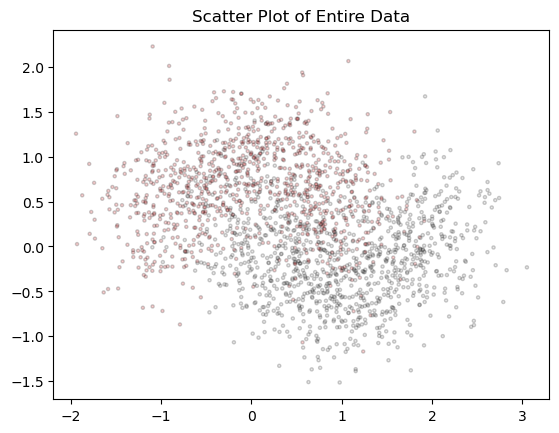

In [141]:
#  Plot the decision boundary and the scatter plot of the dataset
plot_decision_boundary(svm_poly, np.array(X), np.array(y))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='.', s=20, linewidth=1, alpha=0.2, cmap=plt.cm.Set1)
plt.title('Scatter Plot of Entire Data')

## RBF Kernel SVM
Import the `SVC` class from the `sklearn.svm` module and build the SVM classifier using the RBF kernel. 

In [137]:
#  Import the SVC class from sklearn

#  Instantiate and train the SVM classifier. Use RBF kernel. Use the link given above, and play with the parameters to get the best results
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

#### Evaluation


In [138]:
#  Make predictions on the test data
svm_rbf_y_pred = svm_rbf.predict(X_test)

#  Evaluate the model using accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, svm_rbf_y_pred)
precision = precision_score(y_test, svm_rbf_y_pred)
recall = recall_score(y_test, svm_rbf_y_pred)
f1 = f1_score(y_test, svm_rbf_y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.87
Precision: 0.90
Recall: 0.82
F1 Score: 0.86


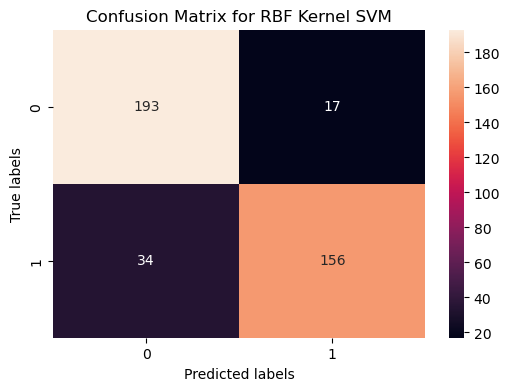

In [145]:
#  Create a confusion matrix and plot it using a heatmap. 
# You can use sklearn's confusion_matrix function to create the matrix
# and seaborn's heatmap function to plot it. The libraries has been imported for you

conf_matrix = confusion_matrix(y_test, svm_rbf_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for RBF Kernel SVM')
plt.show()

#### Plot Decision Boundary


/Users/ajm/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


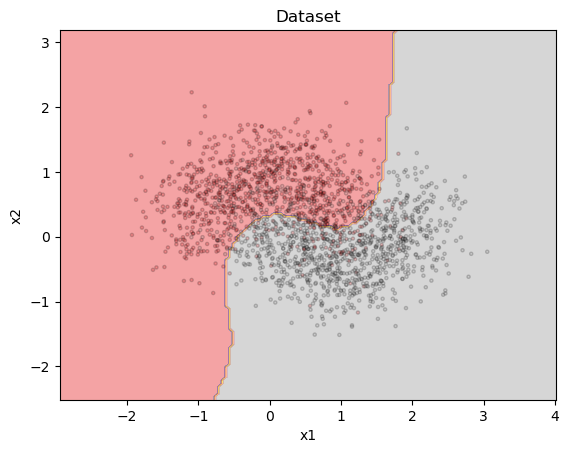

Text(0.5, 1.0, 'Scatter Plot of Entire Data')

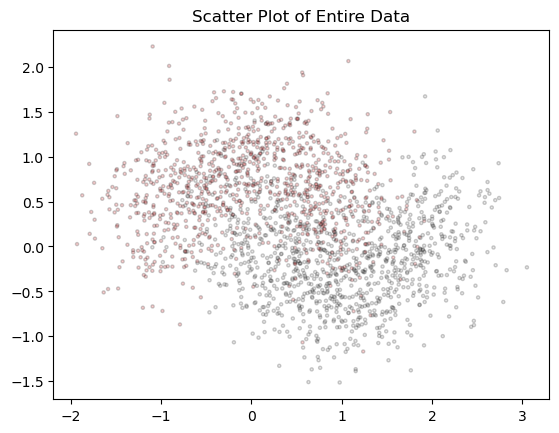

In [144]:
#  Plot the decision boundary and the scatter plot of the dataset
plot_decision_boundary(svm_rbf, X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='.', s=20, linewidth=1, alpha=0.2, cmap=plt.cm.Set1)
plt.title('Scatter Plot of Entire Data')

The RBF kernel SVM has the highest accuracy, precision, recall, and F1 score, suggesting it is the best among the three for this particular dataset. It balances the trade-off between correct classification of the positive class and the incorrect classification of the negative class. The Linear kernel SVM on the other hand has a decent performance but is not as effective as the RBF kernel due to the inability of a linear decision boundary to fully capture the complexities of the data which can be seen in its missclassification of most points. The Polynomial kernel SVM has the highest precision but the lowest recall, indicating that while it is very confident in its positive predictions, it fails to identify a significant portion of actual positive cases which can be because of the setting of the degree of polynomial chosen. To conclude, we can say that RBF performs best because it has the highest performance and effectively captures the non-linear patterns in the dataset. 
